In [128]:
"""
Load:
  x_a_init.txt
Save:
  x_b.txt
  x_a.txt
"""
import numpy as np
from scipy.integrate import ode
import lorenz96
import matplotlib.pyplot as plt
from settings import *
import matplotlib.pyplot as plt
nT = 800

#set random seed
np.random.seed(201910)

#load true value
x_t_save = np.genfromtxt('x_t.txt')
#print(x_t_save[0])


# load initial condition
x_a_init = np.genfromtxt('x_a_init.txt')
analysis_error = 25.e-2
#x_a_init = np.genfromtxt('x_t.txt')[800] + analysis_error * np.random.randn(N)  # using nature run value plus a small error (for test purpose)
#print(x_a_init[:])

np.random.seed(20191031)
# create observations

observation_error = 25.e-2
y_o_save = np.zeros([nT+1, N])
y_o_save = x_t_save + observation_error * np.random.randn(nT+1, N)
#print(y_o_save[0])

# initial x_b: no values at the initial time (assign NaN)
x_b_save = np.full((1,N), np.nan, dtype='f8')
##print(x_b_save)
# initial x_a: from x_a_ens_init

x_a_save = np.array([x_a_init])
##print(x_a_save)


tt = 1

B = 0.0844 * np.identity(40)#backound error covariance 
#B = 0.25 * np.identity(40)#backound error covariance 

#B = np.genfromtxt('B_1224_raw.txt')
#B = B*0.6
R = 0.25 * np.identity(40) #observation error covariance

for i in range(40):
    for j in range(40):
        i = j
        if j+1 != 40:
            B[i][j+1] = 0.0064
        else:
            B[i][j+1-40] = 0.0064
            
        if j+1 != 40 and j+2 != 40:
            B[i][j+2] = -0.013
        else:
            B[i][j+2-40] = -0.013
            
        if j-1 != -1 :
            B[i][j-1] = +0.0064
        else:
            B[i][j-2+40] = +0.0064
            
        if j-2 != -1 and j-1 != -1:
            B[i][j-2] = -0.013
        else:
            B[i][j-2+40] = -0.013

while tt <= nT:#nT:
    tts = tt - 1
    Ts = tts * dT  # forecast start time
    Ta = tt  * dT  # forecast end time (DA analysis time)
    print('Cycle =', tt, ', Ts =', round(Ts, 10), ', Ta =', round(Ta, 10))

    #--------------
    # forecast step
    #--------------

    solver = ode(lorenz96.f).set_integrator('dopri5')
    solver.set_initial_value(x_a_save[tts], Ts).set_f_params(F)
    solver.integrate(Ta)
    print("a",x_b_save.shape)
    x_b_save = np.vstack([x_b_save, [solver.y]])
    #--------------
    # analysis step
    #--------------

    # background

    x_b = x_b_save[tt].transpose()

    # observation

    # innovation
    y_o = y_o_save[tt].transpose()
    H = np.identity(40)
    y_b = np.dot(H, x_b)
    d = y_o - y_b

    # analysis scheme 
    K = np.dot(B, np.dot(H, np.linalg.inv(np.dot(H, np.dot(B,H))+R)))

    x_a = x_b + np.dot(K,d)
    #x_a = (x_b + y_o)/2
    
    x_a_save = np.vstack([x_a_save, x_a.transpose()])
    #print(x_a_save)
    tt += 1


# save background and analysis data
np.savetxt('x_b_OI.txt', x_b_save)
np.savetxt('x_a_OI.txt', x_a_save)

Cycle = 1 , Ts = 0.0 , Ta = 0.05
a (1, 40)
Cycle = 2 , Ts = 0.05 , Ta = 0.1
a (2, 40)
Cycle = 3 , Ts = 0.1 , Ta = 0.15
a (3, 40)
Cycle = 4 , Ts = 0.15 , Ta = 0.2
a (4, 40)
Cycle = 5 , Ts = 0.2 , Ta = 0.25
a (5, 40)
Cycle = 6 , Ts = 0.25 , Ta = 0.3
a (6, 40)
Cycle = 7 , Ts = 0.3 , Ta = 0.35
a (7, 40)
Cycle = 8 , Ts = 0.35 , Ta = 0.4
a (8, 40)
Cycle = 9 , Ts = 0.4 , Ta = 0.45
a (9, 40)
Cycle = 10 , Ts = 0.45 , Ta = 0.5
a (10, 40)
Cycle = 11 , Ts = 0.5 , Ta = 0.55
a (11, 40)
Cycle = 12 , Ts = 0.55 , Ta = 0.6
a (12, 40)
Cycle = 13 , Ts = 0.6 , Ta = 0.65
a (13, 40)
Cycle = 14 , Ts = 0.65 , Ta = 0.7
a (14, 40)
Cycle = 15 , Ts = 0.7 , Ta = 0.75
a (15, 40)
Cycle = 16 , Ts = 0.75 , Ta = 0.8
a (16, 40)
Cycle = 17 , Ts = 0.8 , Ta = 0.85
a (17, 40)
Cycle = 18 , Ts = 0.85 , Ta = 0.9
a (18, 40)
Cycle = 19 , Ts = 0.9 , Ta = 0.95
a (19, 40)
Cycle = 20 , Ts = 0.95 , Ta = 1.0
a (20, 40)
Cycle = 21 , Ts = 1.0 , Ta = 1.05
a (21, 40)
Cycle = 22 , Ts = 1.05 , Ta = 1.1
a (22, 40)
Cycle = 23 , Ts = 1.1 , Ta =

Cycle = 194 , Ts = 9.65 , Ta = 9.7
a (194, 40)
Cycle = 195 , Ts = 9.7 , Ta = 9.75
a (195, 40)
Cycle = 196 , Ts = 9.75 , Ta = 9.8
a (196, 40)
Cycle = 197 , Ts = 9.8 , Ta = 9.85
a (197, 40)
Cycle = 198 , Ts = 9.85 , Ta = 9.9
a (198, 40)
Cycle = 199 , Ts = 9.9 , Ta = 9.95
a (199, 40)
Cycle = 200 , Ts = 9.95 , Ta = 10.0
a (200, 40)
Cycle = 201 , Ts = 10.0 , Ta = 10.05
a (201, 40)
Cycle = 202 , Ts = 10.05 , Ta = 10.1
a (202, 40)
Cycle = 203 , Ts = 10.1 , Ta = 10.15
a (203, 40)
Cycle = 204 , Ts = 10.15 , Ta = 10.2
a (204, 40)
Cycle = 205 , Ts = 10.2 , Ta = 10.25
a (205, 40)
Cycle = 206 , Ts = 10.25 , Ta = 10.3
a (206, 40)
Cycle = 207 , Ts = 10.3 , Ta = 10.35
a (207, 40)
Cycle = 208 , Ts = 10.35 , Ta = 10.4
a (208, 40)
Cycle = 209 , Ts = 10.4 , Ta = 10.45
a (209, 40)
Cycle = 210 , Ts = 10.45 , Ta = 10.5
a (210, 40)
Cycle = 211 , Ts = 10.5 , Ta = 10.55
a (211, 40)
Cycle = 212 , Ts = 10.55 , Ta = 10.6
a (212, 40)
Cycle = 213 , Ts = 10.6 , Ta = 10.65
a (213, 40)
Cycle = 214 , Ts = 10.65 , Ta = 1

Cycle = 391 , Ts = 19.5 , Ta = 19.55
a (391, 40)
Cycle = 392 , Ts = 19.55 , Ta = 19.6
a (392, 40)
Cycle = 393 , Ts = 19.6 , Ta = 19.65
a (393, 40)
Cycle = 394 , Ts = 19.65 , Ta = 19.7
a (394, 40)
Cycle = 395 , Ts = 19.7 , Ta = 19.75
a (395, 40)
Cycle = 396 , Ts = 19.75 , Ta = 19.8
a (396, 40)
Cycle = 397 , Ts = 19.8 , Ta = 19.85
a (397, 40)
Cycle = 398 , Ts = 19.85 , Ta = 19.9
a (398, 40)
Cycle = 399 , Ts = 19.9 , Ta = 19.95
a (399, 40)
Cycle = 400 , Ts = 19.95 , Ta = 20.0
a (400, 40)
Cycle = 401 , Ts = 20.0 , Ta = 20.05
a (401, 40)
Cycle = 402 , Ts = 20.05 , Ta = 20.1
a (402, 40)
Cycle = 403 , Ts = 20.1 , Ta = 20.15
a (403, 40)
Cycle = 404 , Ts = 20.15 , Ta = 20.2
a (404, 40)
Cycle = 405 , Ts = 20.2 , Ta = 20.25
a (405, 40)
Cycle = 406 , Ts = 20.25 , Ta = 20.3
a (406, 40)
Cycle = 407 , Ts = 20.3 , Ta = 20.35
a (407, 40)
Cycle = 408 , Ts = 20.35 , Ta = 20.4
a (408, 40)
Cycle = 409 , Ts = 20.4 , Ta = 20.45
a (409, 40)
Cycle = 410 , Ts = 20.45 , Ta = 20.5
a (410, 40)
Cycle = 411 , Ts = 2

Cycle = 595 , Ts = 29.7 , Ta = 29.75
a (595, 40)
Cycle = 596 , Ts = 29.75 , Ta = 29.8
a (596, 40)
Cycle = 597 , Ts = 29.8 , Ta = 29.85
a (597, 40)
Cycle = 598 , Ts = 29.85 , Ta = 29.9
a (598, 40)
Cycle = 599 , Ts = 29.9 , Ta = 29.95
a (599, 40)
Cycle = 600 , Ts = 29.95 , Ta = 30.0
a (600, 40)
Cycle = 601 , Ts = 30.0 , Ta = 30.05
a (601, 40)
Cycle = 602 , Ts = 30.05 , Ta = 30.1
a (602, 40)
Cycle = 603 , Ts = 30.1 , Ta = 30.15
a (603, 40)
Cycle = 604 , Ts = 30.15 , Ta = 30.2
a (604, 40)
Cycle = 605 , Ts = 30.2 , Ta = 30.25
a (605, 40)
Cycle = 606 , Ts = 30.25 , Ta = 30.3
a (606, 40)
Cycle = 607 , Ts = 30.3 , Ta = 30.35
a (607, 40)
Cycle = 608 , Ts = 30.35 , Ta = 30.4
a (608, 40)
Cycle = 609 , Ts = 30.4 , Ta = 30.45
a (609, 40)
Cycle = 610 , Ts = 30.45 , Ta = 30.5
a (610, 40)
Cycle = 611 , Ts = 30.5 , Ta = 30.55
a (611, 40)
Cycle = 612 , Ts = 30.55 , Ta = 30.6
a (612, 40)
Cycle = 613 , Ts = 30.6 , Ta = 30.65
a (613, 40)
Cycle = 614 , Ts = 30.65 , Ta = 30.7
a (614, 40)
Cycle = 615 , Ts = 3

Cycle = 789 , Ts = 39.4 , Ta = 39.45
a (789, 40)
Cycle = 790 , Ts = 39.45 , Ta = 39.5
a (790, 40)
Cycle = 791 , Ts = 39.5 , Ta = 39.55
a (791, 40)
Cycle = 792 , Ts = 39.55 , Ta = 39.6
a (792, 40)
Cycle = 793 , Ts = 39.6 , Ta = 39.65
a (793, 40)
Cycle = 794 , Ts = 39.65 , Ta = 39.7
a (794, 40)
Cycle = 795 , Ts = 39.7 , Ta = 39.75
a (795, 40)
Cycle = 796 , Ts = 39.75 , Ta = 39.8
a (796, 40)
Cycle = 797 , Ts = 39.8 , Ta = 39.85
a (797, 40)
Cycle = 798 , Ts = 39.85 , Ta = 39.9
a (798, 40)
Cycle = 799 , Ts = 39.9 , Ta = 39.95
a (799, 40)
Cycle = 800 , Ts = 39.95 , Ta = 40.0
a (800, 40)


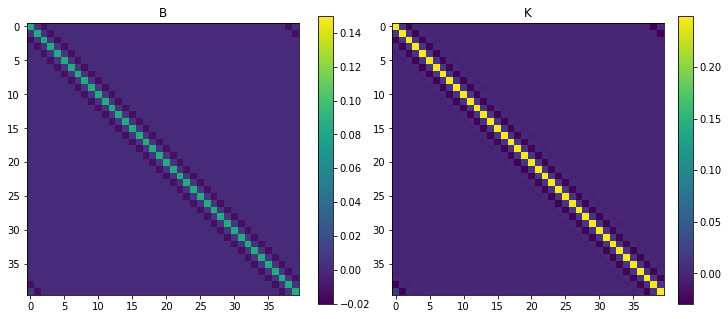

In [143]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
ax.set_title('B')
plt.imshow(B,vmin=-0.02,vmax=0.15)
ax.set_aspect('equal')
cax = fig.add_axes([0.26, 0.1, 0.26, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

ax2 = fig.add_subplot(122)
ax2.set_title('K')
plt.imshow(K)
ax2.set_aspect('equal')

cax = fig.add_axes([0.26, 0.1, 0.75, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

In [114]:
#np.savetxt('B.txt', B)

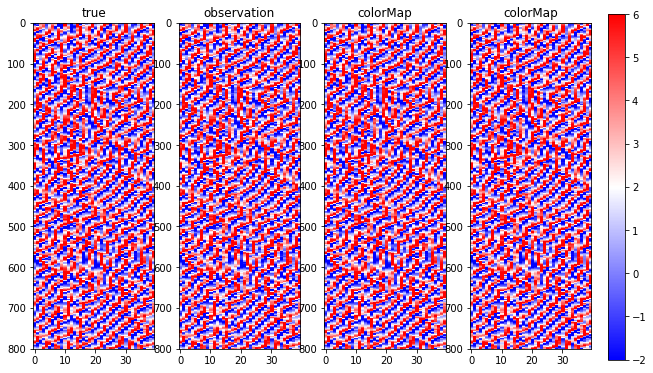

In [144]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(141)
ax.set_title('true')
plt.imshow(x_t_save, cmap = "bwr", vmin=-2, vmax=6)
ax.set_aspect('auto')

ax2 = fig.add_subplot(142)
ax2.set_title('observation')
plt.imshow(y_o_save, cmap = "bwr", vmin=-2, vmax=6)
ax2.set_aspect('auto')


ax3 = fig.add_subplot(143)
ax3.set_title('colorMap')
plt.imshow(x_a_save, cmap = "bwr", vmin=-2, vmax=6)
ax3.set_aspect('auto')


ax4 = fig.add_subplot(144)
ax4.set_title('colorMap')
plt.imshow(x_b_save, cmap = "bwr", vmin=-2, vmax=6)
ax4.set_aspect('auto')


cax = fig.add_axes([0.26, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

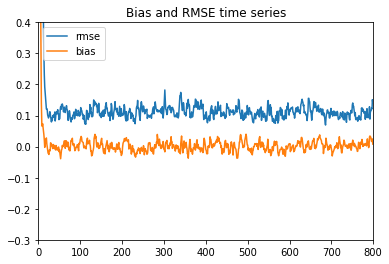

rmse= 0.11076837016804911
bias= 0.0010269138571126814


In [145]:
analysis_error = x_b_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)


plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label ="bias")
plt.ylim(-0.3,0.4)
plt.xlim(0,800)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()
rmse = rmse_t[30:800].mean()
bias = bias_t[30:800].mean()
print("rmse=",rmse)
print("bias=",bias)
np.savetxt('OI_bias.txt',bias_t)
np.savetxt('OI_rmse.txt',rmse_t)